A proveniência dos dados é importante para agregar metadados sobre a origem, sua obtenção e mais informações sobre os dados, o que enriquece a pesquisa científica e a identificação da autoria [@buneman2007provenance]. Para adicionar proveniência ao trabalho, utilizamos a biblioteca `prov`, que é a alternativa em Python para o modelo fornecido em [@missier2013w3c]. Sua instalação é feita como na célula abaixo.

In [1]:
pip install prov

     |████████████████████████████████| 421 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 500 kB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 2.0 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Tendo a biblioteca instalada, é possível importar o necessário. Além disso, nessa primeira etapa, é inicializado o documento de proveniência.  
Rode a célula abaixo sempre antes de escrever um novo grafo de proveniência, senão, vai pegar informações do grafo anteriormente gerado.

In [78]:
from prov.model import ProvDocument, PROV
d = ProvDocument()

Para obter o grafo de proveniência como resultado, é necessário definir os agentes, as entidades e atividades, tal qual descrito abaixo:

In [79]:
graph      = 'grafo_de_proveniencia_novo'

# entidades
entity_inep = 'censo_graduação_resultados'
entities_inep_zip = ['censo_2010.zip', 'censo_2011.zip', 'censo_2012.zip', 
                     'censo_2013.zip', 'censo_2014.zip', 'censo_2015.zip', 
                     'censo_2016.zip', 'censo_2017.zip', 'censo_2018.zip', 
                     'censo_2019.zip'] 
data_dict_inep_xlsx = ['dicionario_de_dados_2010.xlsx', 'dicionario_de_dados_2011.xlsx', 
                     'dicionario_de_dados_2012.xlsx', 'dicionario_de_dados_2013.xlsx', 
                     'dicionario_de_dados_2014.xlsx', 'dicionario_de_dados_2015.xlsx', 
                     'dicionario_de_dados_2016.xlsx', 'dicionario_de_dados_2017.xlsx', 
                     'dicionario_de_dados_2018.xlsx', 'dicionario_de_dados_2019.xlsx']
entities_inep_csv = ['MICRODADOS_CADASTRO_CURSOS_2010.CSV', 'MICRODADOS_CADASTRO_CURSOS_2011.CSV', 
                     'MICRODADOS_CADASTRO_CURSOS_2012.CSV', 'MICRODADOS_CADASTRO_CURSOS_2013.CSV', 
                     'MICRODADOS_CADASTRO_CURSOS_2014.CSV', 'MICRODADOS_CADASTRO_CURSOS_2015.CSV', 
                     'MICRODADOS_CADASTRO_CURSOS_2016.CSV', 'MICRODADOS_CADASTRO_CURSOS_2017.CSV', 
                     'MICRODADOS_CADASTRO_CURSOS_2018.CSV', 'MICRODADOS_CADASTRO_CURSOS_2019.CSV']
entity_1  = 'Dataset_Agregado'
entity_2  = 'Dataset_Filtrado_Tratado'

# agentes com historico
agent_ufrj = 'UFRJ'
agent_ppgi = 'PPGI'
agent_disciplina = 'Fundamentos_de_Ciencia_de_Dados'
agent_grupo = 'Grupo 5'
agent_codigo = 'código_fonte'
agents_integrantes_grupo = {'Alexandre': 'Alexandre N. Louzada', 'Lenise': 'Lenise M. V. Rodrigues', 
                            'Lucas': 'Lucas Lopes Felipe', 'Luciane': 'Luciane C. J. de Deus'}

# atividades
activity    = 'Download_dos_Dados_Compactados'
activity_1  = 'Extração_do_CSV'
activity_2  = 'Agregação_dos_Datasets_em_CSV'
activity_3  = 'Estudo_Inicial_do_Dicionário'
activity_4  = 'Seleção_dos_Cursos_STEM'
activity_5  = 'Renomeação_das_Colunas'
activity_6  = 'Aplicação_do_Tratamento'
# activity_7  = 'Criação_do_Dicionário_de_Dados'
activity_7  = 'Análise_e_Investigações'
activity_8  = 'Análise_dos_Histogramas'
activity_9  = 'Análise_por_Features'

Tendo isso, passamos para a construção do grafo de acordo com o que foi usado na pesquisa, definindo os prefixos, adicionando agentes, entidades e atividades, configurando geradores e fazendo as devidas atribuições. 

In [80]:
import datetime
# Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira

# Declaração dos namespaces para os prefixos do trabalho
d.add_namespace('inep', 'https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-da-educacao-superior/resultados')
d.add_namespace('ufrj', 'http://www.ufrj.br/ppgi/')
d.add_namespace("foaf", "http://xmlns.com/foaf/0.1/")

# Adição do agente do inep
# e das entidades ligadas ao inep
# e atribuições das execuções
agent_inep = d.agent("inep:INEP")
activity_inep = d.activity("inep:criar_dataset")
e_inep = d.entity("inep:" + entity_inep, {'prov:label': 'Representação das informações do censo da educação superior, com todos os anos juntos',
                  'prov:type': 'foaf:Document'})
d.wasAssociatedWith(activity_inep, agent_inep)
d.wasGeneratedBy(e_inep, activity_inep)


# Adição das atividades da UFRJ ligadas às entidades do INEP
activity_download = d.activity("ufrj:" + activity)
d.wasAssociatedWith(activity_download, agent_GRUPO)
activity_extracao = d.activity("ufrj:" + activity_1)
d.wasAssociatedWith(activity_extracao, agent_GRUPO)
activity_agregacao = d.activity("ufrj:" + activity_2)
d.wasAssociatedWith(activity_agregacao, agent_GRUPO)
activity_data_dict = d.activity("ufrj:" + activity_3)
d.wasAssociatedWith(activity_data_dict, agent_GRUPO)
d.used(activity_download, e_inep)

for i in range(0, 10):
    e  = d.entity("inep:" + entities_inep_zip[i], {'prov:label': f'ZIP com as informações do censo da educação superior do ano {i}',
                  'prov:type': 'foaf:Document'})
    e2 = d.entity("inep:" + data_dict_inep_xlsx[i], {'prov:label': f'xlsx com o dicionário de dados do censo da educação superior do ano {i}',
                  'prov:type': 'foaf:Document'})
    e3 = d.entity("inep:" + entities_inep_csv[i], {'prov:label': f'CSV com o dataset do censo da educação superior do ano {i}',
                  'prov:type': 'foaf:Document'})
    d.wasDerivedFrom(e, e_inep)
    d.wasDerivedFrom(e2, e)
    d.wasDerivedFrom(e3, e)
    d.used(activity_extracao, e)
    d.used(activity_data_dict, e2)
    d.used(activity_agregacao, e3)

# Definição e associação do dataset agregado
entity_agregado = d.entity("ufrj:" + entity_1, {'prov:label': f'Dataset com a agregação de todos os dados do censo da educação superior de todos os anos',
                  'prov:type': 'foaf:Document', 'prov:generatedAtTime': str(datetime.datetime.utcnow())})
d.wasGeneratedBy(entity_agregado, activity_extracao)

# Adição dos agentes da UFRJ com histórico
agent_UFRJ = d.agent("ufrj:" + agent_ufrj, 
                    {'prov:label': PROV["Organization"],
                     "foaf:name": 'Universidade Federal do Rio de Janeiro',
                     'prov:generatedAtTime': str(datetime.datetime.utcnow())})
agent_PPGI = d.agent("ufrj:" + agent_ppgi, 
                    {'prov:label': PROV["Organization"],
                     'foaf:name': 'Programa de Pós Graduação em Informática',
                     'prov:generatedAtTime': str(datetime.datetime.utcnow())})
d.actedOnBehalfOf(agent_PPGI, agent_UFRJ)
agent_DISCIPLINA = d.agent("ufrj:" + agent_disciplina, 
                    {'prov:label': PROV["Organization"],
                     'foaf:name': 'Disciplina Fundamentos de Ciências de Dados',
                     'prov:generatedAtTime': str(datetime.datetime.utcnow())})
d.actedOnBehalfOf(agent_DISCIPLINA, agent_PPGI)
agent_GRUPO = d.agent("ufrj:" + agent_grupo, 
                    {'prov:label': PROV["Organization"],
                     'foaf:name': 'Grupo 5 - Trabalho Final',
                     'prov:generatedAtTime': str(datetime.datetime.utcnow())})
d.actedOnBehalfOf(agent_GRUPO, agent_DISCIPLINA)
agent_CODIGO = d.agent("ufrj:" + agent_codigo, 
                    {'prov:label': 'Código utilizado no trabalho',
                     'prov:type': PROV["SoftwareAgent"],
                     'prov:generatedAtTime': str(datetime.datetime.utcnow())})
d.actedOnBehalfOf(agent_CODIGO, agent_GRUPO)
for agent, name in agents_integrantes_grupo.items():
    a = "ufrj:" + agent
    d.agent(a, {'prov:label': PROV["Person"],
                'foaf:name': name,
                'prov:generatedAtTime': str(datetime.datetime.utcnow())})
    d.actedOnBehalfOf(a, agent_GRUPO)

# Definição e associação do dataset filtrado
entity_filtrado = d.entity("ufrj:" + entity_1, {'prov:label': f'Dataset com os dados do censo da educação superior agregados filtrados, renomeados e tratados',
                  'prov:type': 'foaf:Document', 'prov:generatedAtTime': str(datetime.datetime.utcnow())})
activity_filtrar = d.activity("ufrj:" + activity_4)
d.wasGeneratedBy(entity_filtrado, activity_filtrar)
d.wasAssociatedWith(activity_filtrar, agent_GRUPO)
activity_renomear = d.activity("ufrj:" + activity_5)
d.wasGeneratedBy(entity_filtrado, activity_renomear)
d.wasAssociatedWith(activity_renomear, agent_GRUPO)
activity_tratar = d.activity("ufrj:" + activity_6)
d.wasGeneratedBy(entity_filtrado, activity_tratar)
d.wasAssociatedWith(activity_tratar, agent_GRUPO)

activity_analise = d.activity("ufrj:" + activity_7)
d.used(activity_agregacao, entity_filtrado)
d.wasAssociatedWith(activity_analise, agent_GRUPO)
activity_histograma = d.activity("ufrj:" + activity_8)
d.used(activity_agregacao, entity_filtrado)
d.wasAssociatedWith(activity_histograma, agent_GRUPO)
activity_features = d.activity("ufrj:" + activity_9)
d.used(activity_agregacao, entity_filtrado)
d.wasAssociatedWith(activity_features, agent_GRUPO)

<ProvAssociation: (ufrj:Análise_por_Features, ufrj:Grupo 5)>

In [25]:
!pip install ipython

In [24]:
!pip install pydot

Para visualização gráfica e geração do output em XML, foram necessárias as instalações das bibliotecas acima, além do seguinte comando no terminal(válido para mac os):  
`brew install gprof2dot`  
Ainda é possível essa preparação para visualização gráfica usando o seguinte, conforme disponível no [material dos professores Sérgio Serra e Jorge Zavaleta](https://github.com/zavaleta/Fundamentos_DS/blob/main/FCD_M1_4_Provenance.ipynb):  
`conda install -c anaconda pydot`  
`conda install -c anaconda graphviz`  
Agora, com toda a preparação, é possível gerar o grafo e também um meio de visualizar.

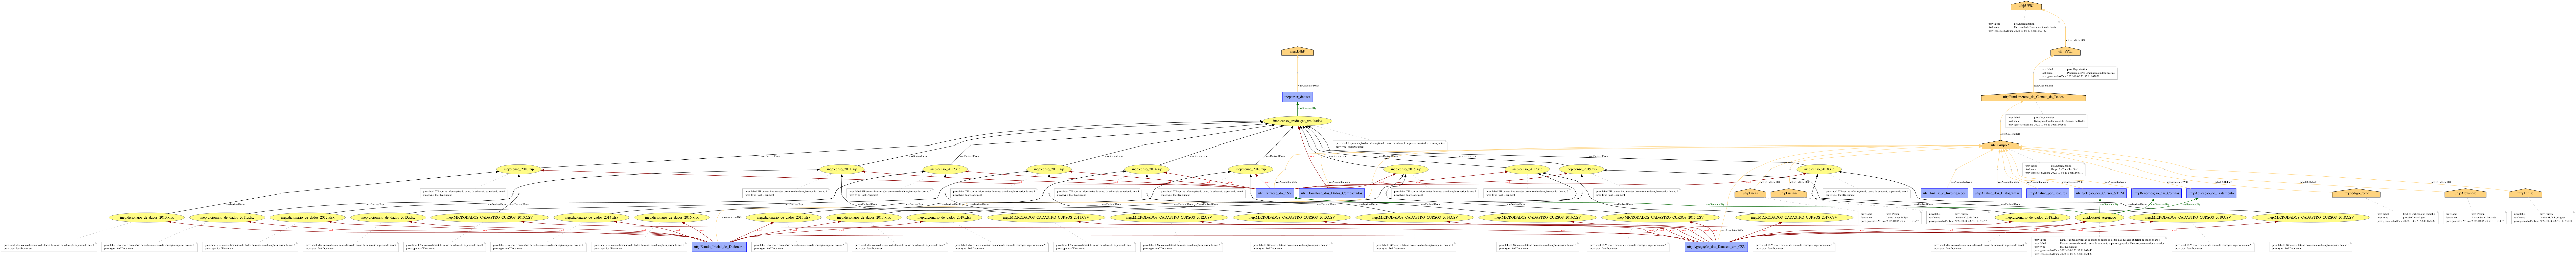

In [81]:
# Criando pasta para armazenar os outputs
import os
provenance_output_dir = "../provenance_data/"
os.makedirs(os.path.dirname(provenance_output_dir), exist_ok=True)

from prov.dot import prov_to_dot
# Generação do Grafo de Proveniência
dot = prov_to_dot(d)
graph_png = graph + ".png"
dot.write_png(provenance_output_dir + graph_png)

# Generação do Output em XML
output_name = provenance_output_dir + "microdados_censo_educacao_superior_new.xml"
d.serialize(output_name, format='xml')

# Visualização do Grafo de Proveniência
from IPython.display import Image
Image(provenance_output_dir + graph_png)